<font color='red'>No se aceptan soluciones que usen metodologías distintas a la vistas en clases.</font>

<font color='orange'>Se puede usar el código de los ejemplos vistos en clases.</font>



# 1) Ingrese su Nombre y Número de alumno/a

(1 Punto)

In [1]:
Nombre = 'Jessica Hormazabal' # Por ejemplo: 'Carmen Gloria Perez'
ID     = '15639150' # Por ejemplo: '12345678K'

# Se puede trabajar en grupo, pero la entrega es individual
Integrantes = [ID,'15639150','17640210'] # Coloque aqui los integrantes del grupo si es que no trabajo de forma individual

print('IMPORTANTE: Cambie el nombre del archivo (arriba-izquierda) por '+ID+'.ipynb')

IMPORTANTE: Cambie el nombre del archivo (arriba-izquierda) por 15639150.ipynb


# 2) Importe las Librerías

(1 Punto)

*Todas las librerías de este código deben ir en esta celda. Sólo está permitido usar las librerías de los ejemplos vistos en clase.*



In [2]:
import numpy as np
from  cv2 import imread, equalizeHist
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# 3) Cargue la Imagen de Tokio

(1 Punto)

*Lea erchivo de la imagen se encuentra en este link:*

`https://www.dropbox.com/s/lm0m77rrusnfj3d/tokio.jpg`



In [3]:
 !wget https://www.dropbox.com/s/lm0m77rrusnfj3d/tokio.jpg

--2021-09-09 16:46:35--  https://www.dropbox.com/s/lm0m77rrusnfj3d/tokio.jpg
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/lm0m77rrusnfj3d/tokio.jpg [following]
--2021-09-09 16:46:36--  https://www.dropbox.com/s/raw/lm0m77rrusnfj3d/tokio.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8676e1014c69d2367b9c2eb2d2.dl.dropboxusercontent.com/cd/0/inline/BV1FjhgZ69KxxJk9p9WToeZngBzJzbisaC5_ID-eRjxX4a0Ailhq_DFWLbwibnFNWi3C8tDy0KPVG-5i45vpbW1lSjwCwG2mhrfJfvCuejSz4xWtU8gH3sqFLFqTtXyo14370ZMnCUBk9XMYUKIwZEYt/file# [following]
--2021-09-09 16:46:36--  https://uc8676e1014c69d2367b9c2eb2d2.dl.dropboxusercontent.com/cd/0/inline/BV1FjhgZ69KxxJk9p9WToeZngBzJzbisaC5_ID-eRjxX4a0Ailhq_DFWLbwibnFNWi3C8tDy0KPVG-5i45vpbW1lSjwCwG2m

# 4) Despliegue la imagen cargada en tonos de gris
(1 Punto)

Cargue la imagen original y transfórmela a tonos de gris <font color='red'> usando los factores de ponderación (0.2, 0.5, 0.3) para los canales rojo, verde y azul respectivamente.</font>


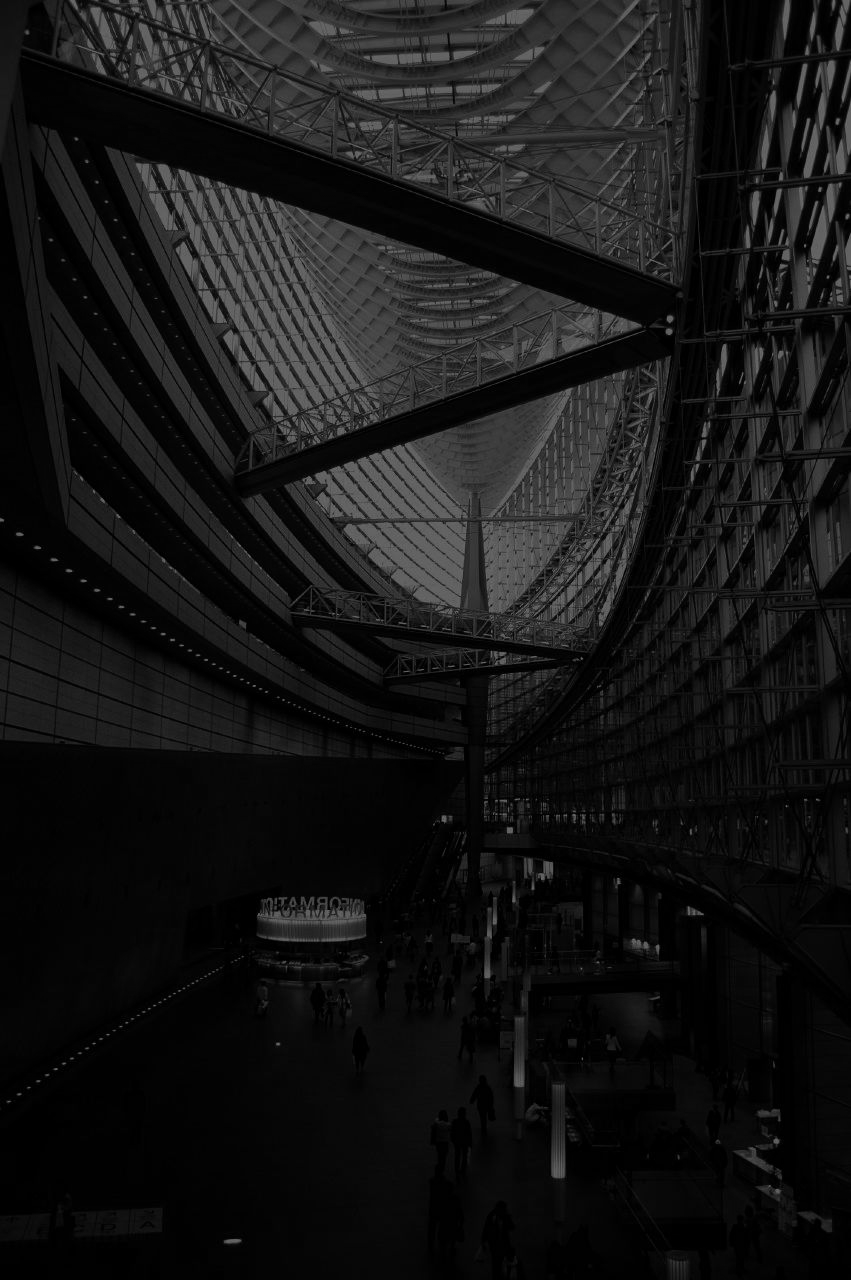

In [4]:
def tonoGrises(img):
  N,M = img[:,:,0].shape
  I = np.zeros((N,M), dtype=np.uint8)
  I[:,:] = img[:,:,2]*0.2 + img[:,:,1]*0.5 + img[:,:,0]*0.3 #R G B
  return I

tokio = imread("tokio.jpg")
grisTokio = tonoGrises(tokio)
cv2_imshow(grisTokio)

# 5) Despliegue el histograma de la imagen anterior



(1 punto)

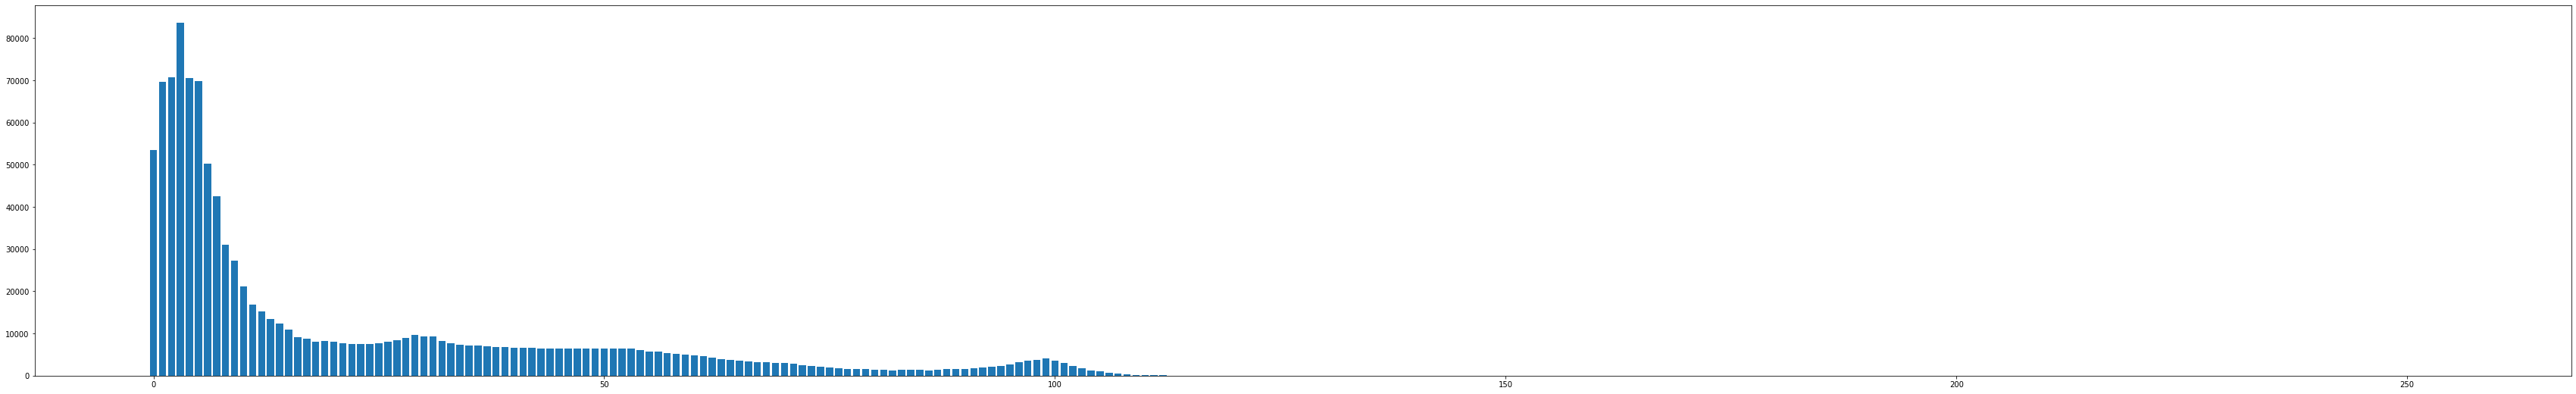

In [5]:
def imhist(X):
  (N,M) = X.shape
  n = 256
  h = np.zeros((256,))
  for i in range(N):
    for j in range(M):
      x = X[i,j]
      h[x] = h[x]+1
  plt.figure(figsize=(60,9))
  plt.bar(range(n),h[0:n])
  plt.show()

imhist(grisTokio)

# 6) Mejoramiento básico

Realice una transformación lineal de los tonos de gris de tal forma que el tono de gris más bajo sea 10 y el más alto sea 240. Despliegue la imagen y su histograma.



(1 Punto)


In [6]:
def howis(img):
  print('size = ',img.shape)
  print('max  = ',np.max(img))
  print('min  = ',np.min(img))

howis(grisTokio)

size =  (1280, 851)
max  =  120
min  =  0


size =  (1280, 851)
max  =  240
min  =  10


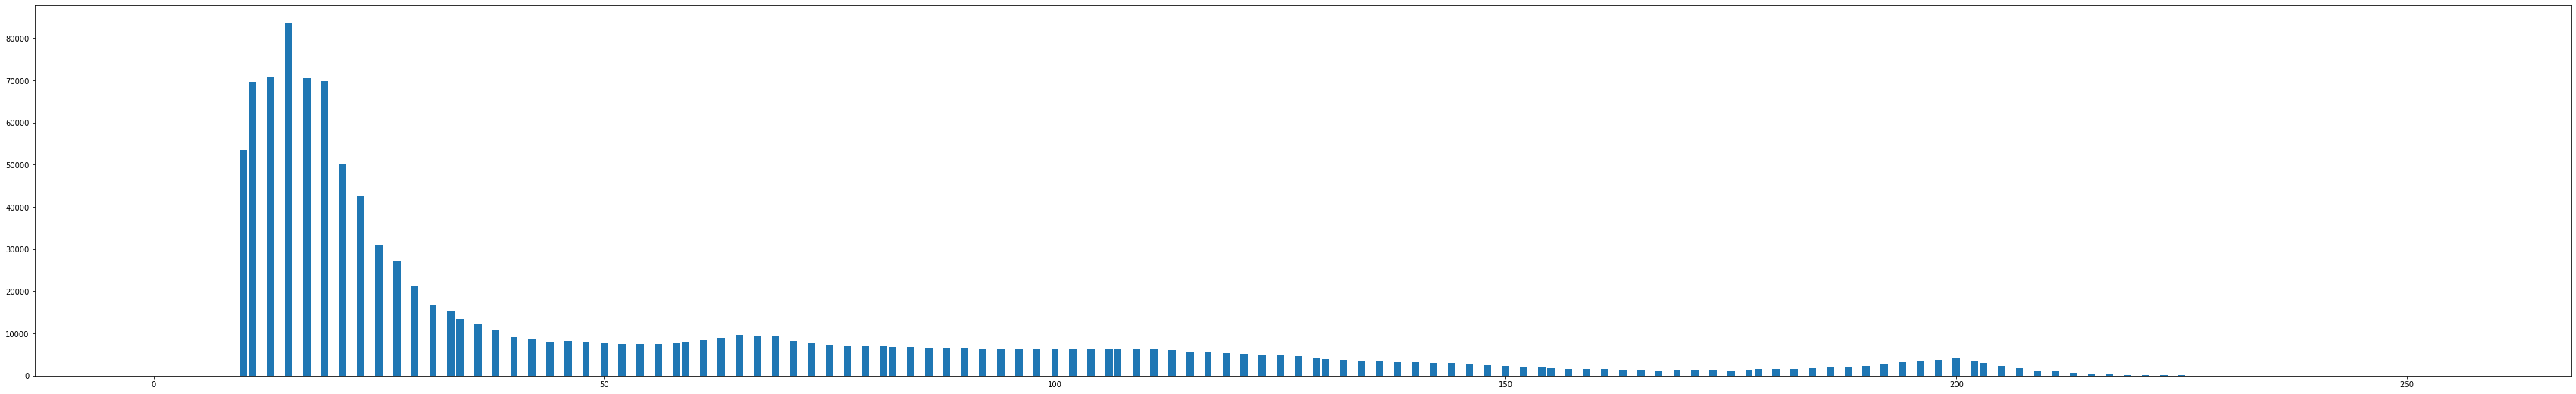

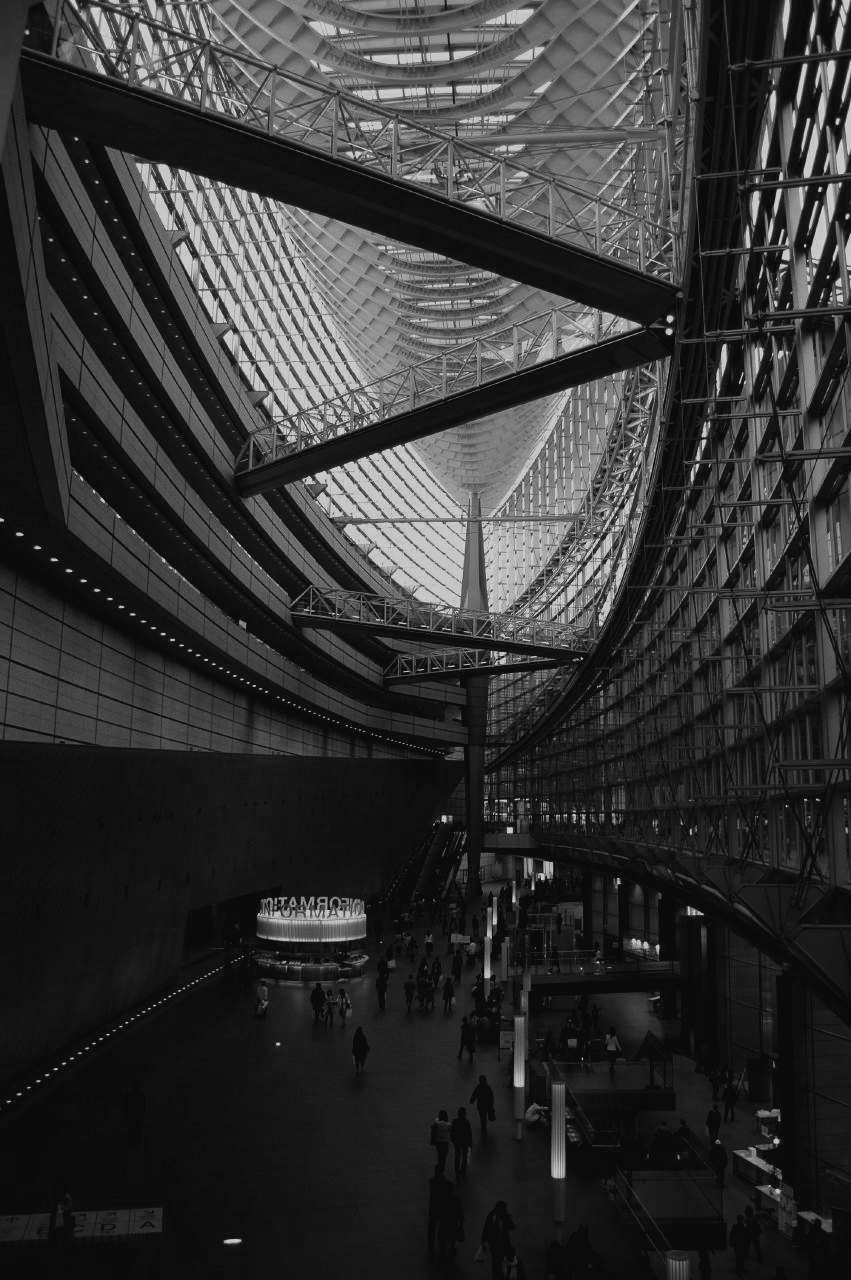

In [7]:
def transformacionLineal(img):
  img_x = img.copy()
  N,M = img_x.shape
  for i in range(N):
    for j in range(M):
      img_x[i,j] = int(img[i,j]*1.92) + 10
  return img_x

transformacionLineal =  transformacionLineal(grisTokio)
howis(transformacionLineal)
imhist(transformacionLineal)
cv2_imshow(transformacionLineal)

# 7) Ecualización

(2 Puntos)

Ecualice la imagen original (cargada en el paso 3) usando los métodos de ecualización vistos en clases, despliegue sus histogramas y escoja (de manera subjetiva) la imagen ecualizada que mejor se ve.




size =  (1280, 851)
max  =  255
min  =  0


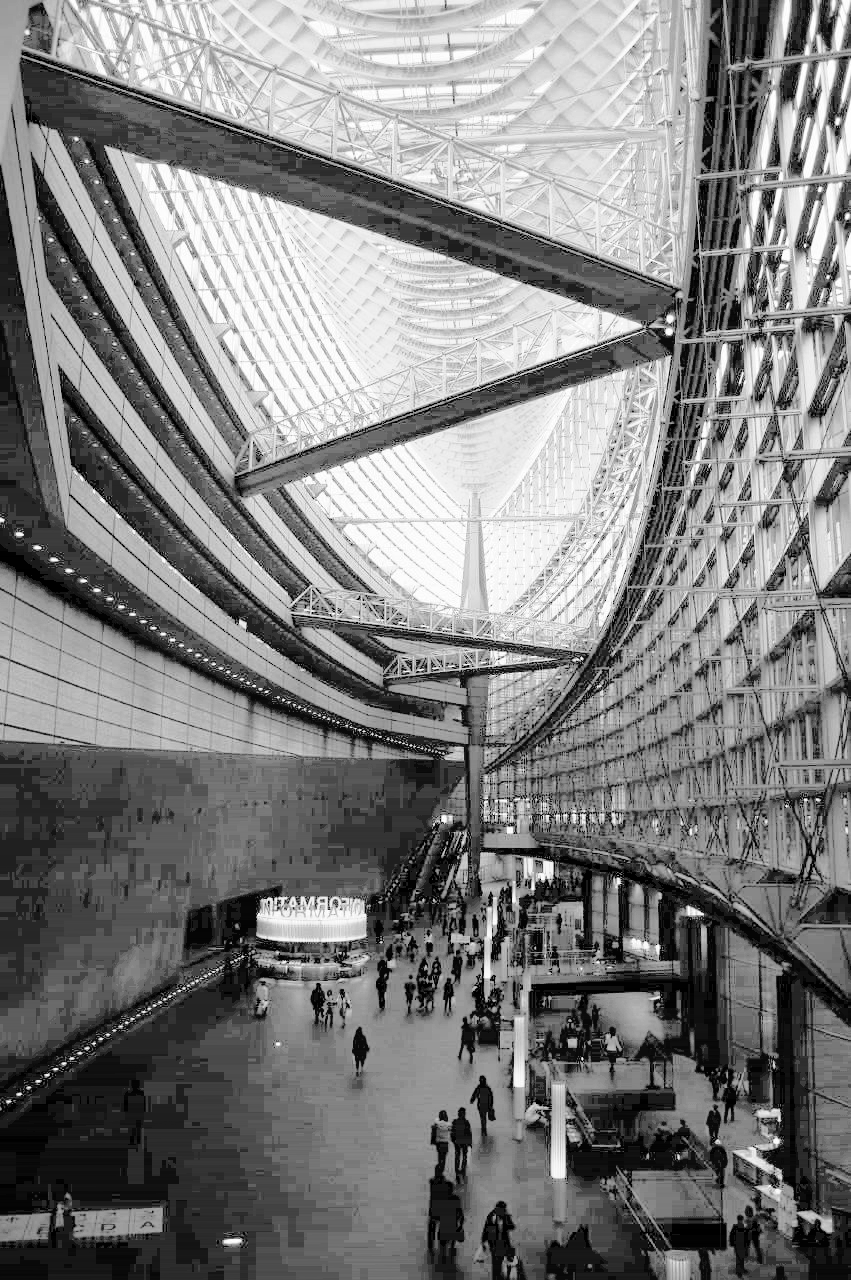

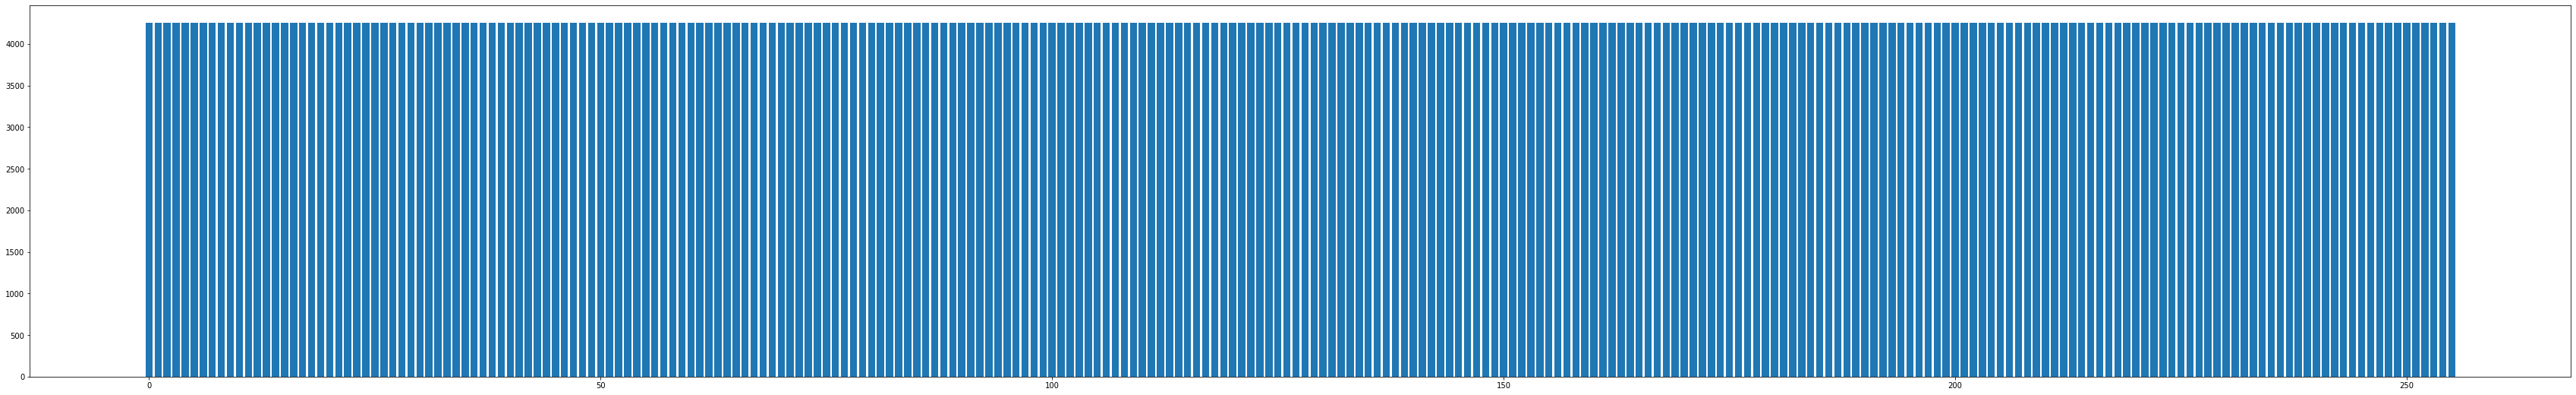

In [8]:
# METODO 1 -> funcion del colab que da uniforme
def hist_metodo1(img):

    img_x = img.copy()
    img_x = 255 * ((img_x - img_x.min()) / (img_x.max() - img_x.min())) 

    n, m = img_x.shape
    y = np.zeros((n * m, 1), dtype=np.uint8)
    j = np.argsort(img_x.flatten())
    z = np.zeros((n * m, 1), dtype=np.uint8)
    d = np.int(np.fix((n * m / 256) + 0.5))

    for i in range(255):
        z[i * d:(i + 1) * d] = i * np.ones((d, 1))  # , dtype=np.uint8)
    z[255 * d:n * m] = 255 * np.ones((n * m - 255 * d, 1))  # , dtype=np.uint8)

    y[j] = z
    y = y.reshape(n, m)

    return y

metodo1 = hist_metodo1(grisTokio)
howis(metodo1)
cv2_imshow(metodo1)
imhist(metodo1)

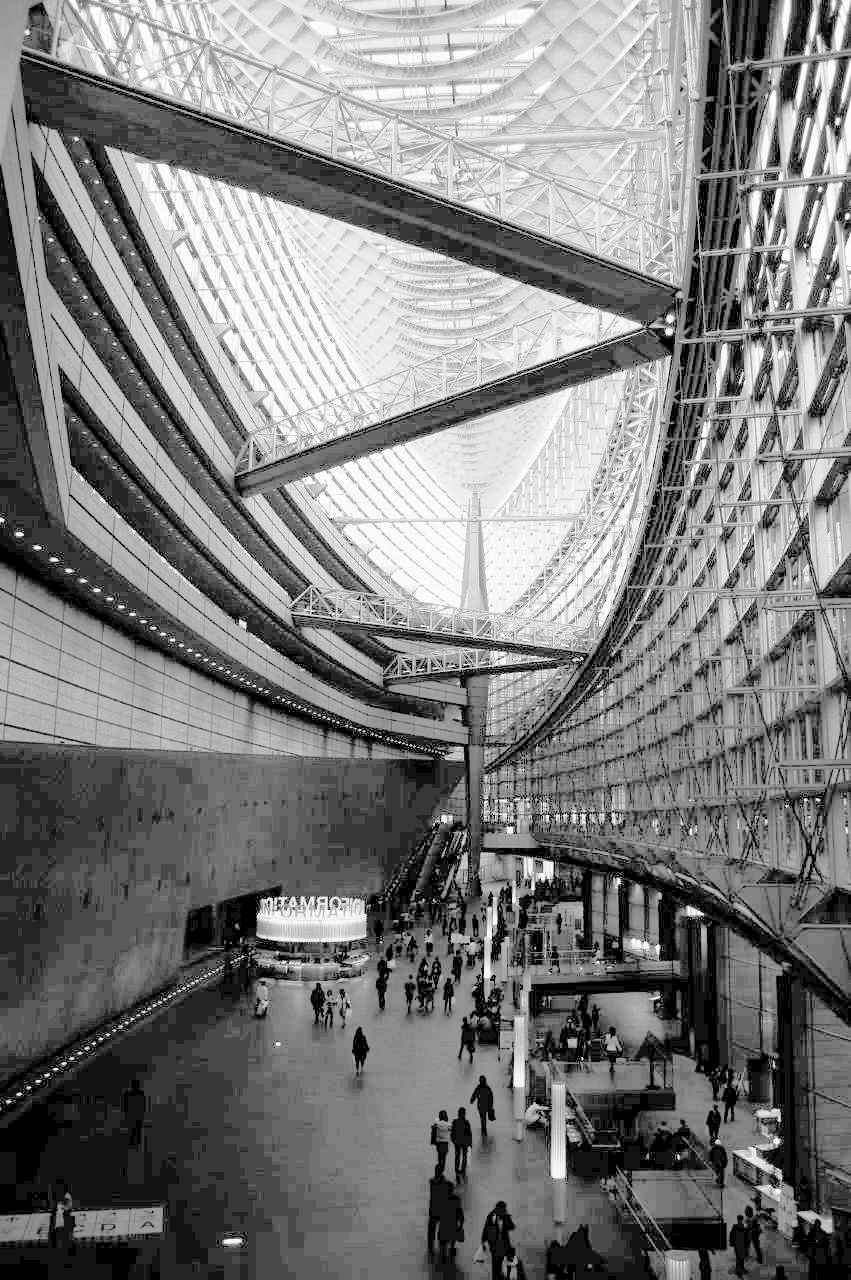

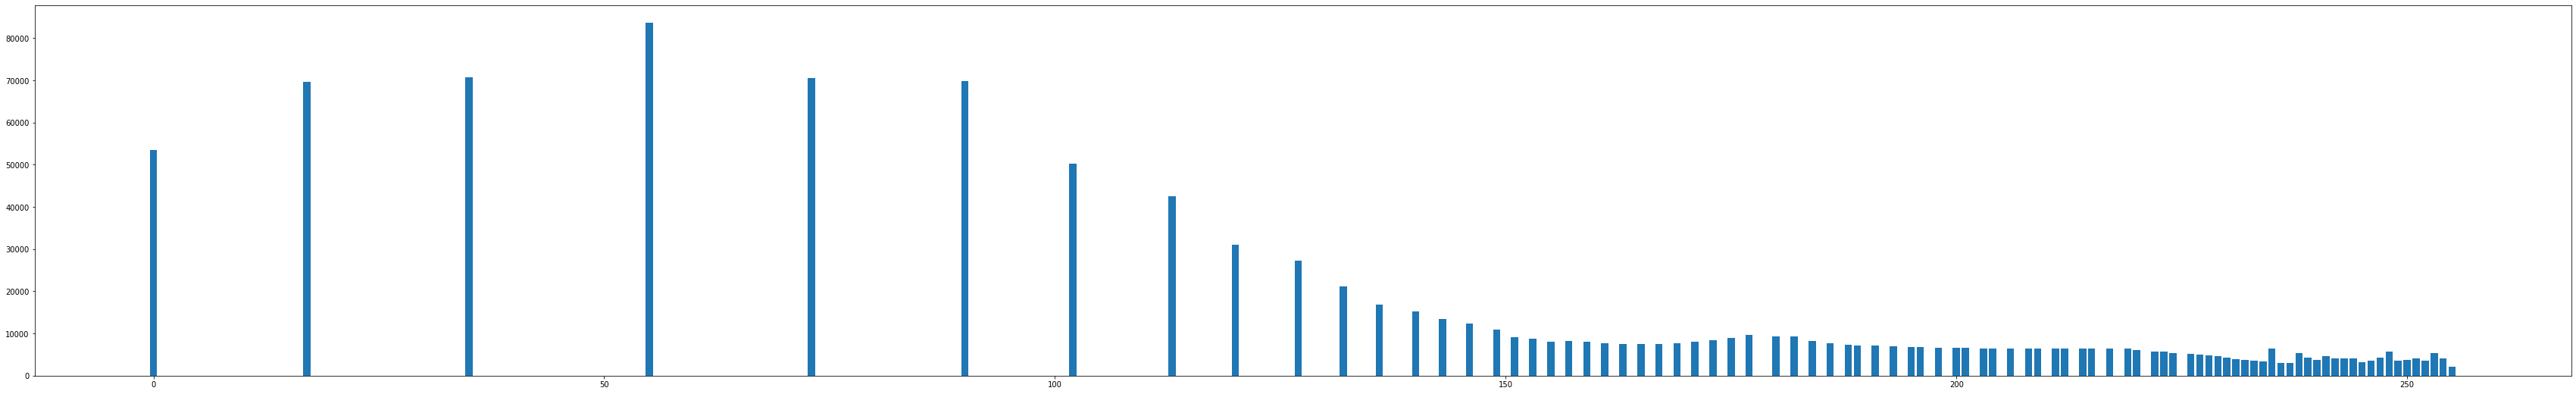

In [9]:
# METODO 2 -> método de opencv 
metodo2 = equalizeHist(grisTokio)
cv2_imshow(metodo2)
imhist(metodo2)

# 8) Filtro pasa bajos

Aplique a la imagen escogida una máscara de n x n pixeles, cuyos pesos son 1/n^2. <font color='red'> Recordar que en este tipo de implementaciones sólo se puede usar la librería numpy.</font> Despliegue el resultado para n=13.


(4 Puntos)


size =  (1280, 851)
max  =  213.10650887573965
min  =  0.0


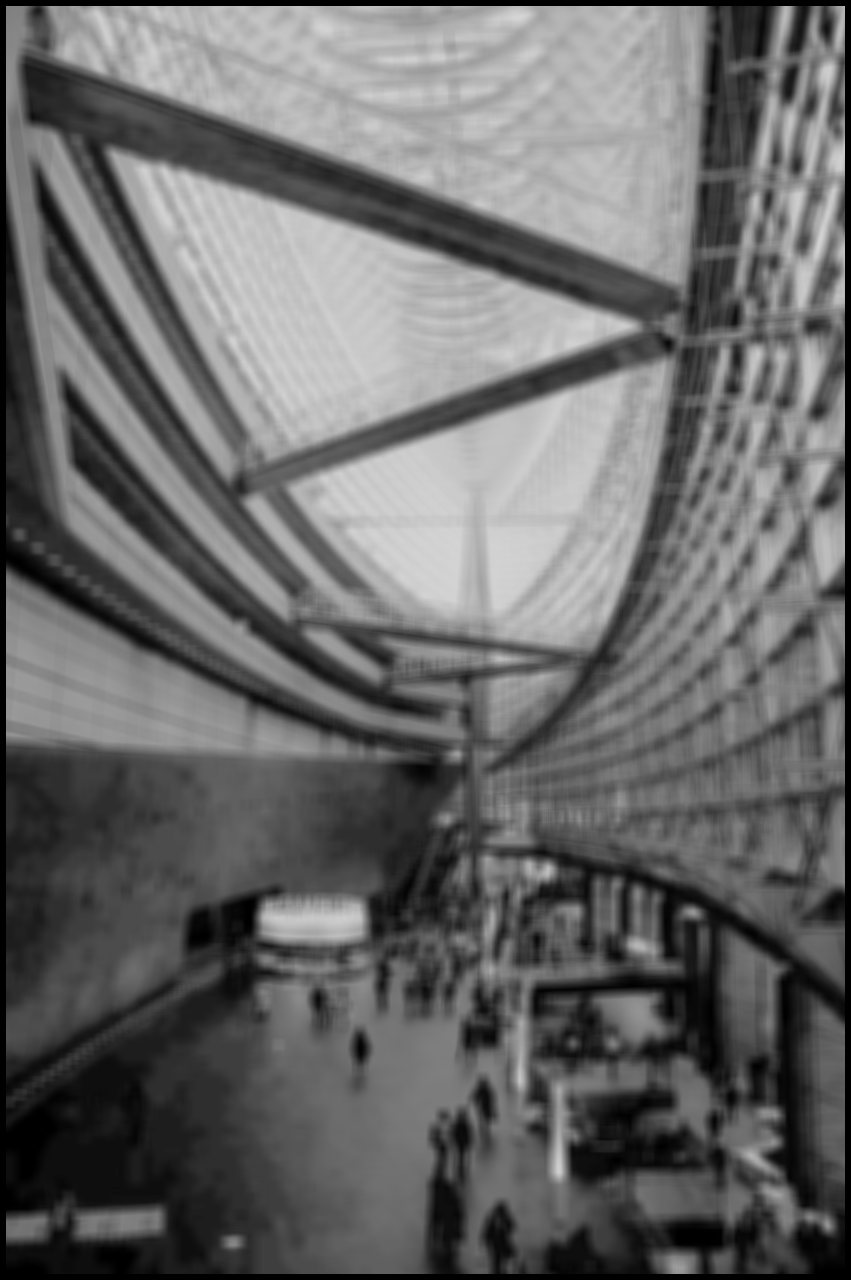

In [10]:
def filtroDown(img, n): # asumiento n impar
  # Debo sumar los n x n pixeles (si es posible) y dividirlos por n**2, caso contrario se quedan negros
  N,M = img.shape
  filtrado = np.zeros((N,M))
  n2 = n//2
  n_2 = n**2
  for i in range(n2,N-n2):
    for j in range(n2, M-n2):
      filtrado[i,j] = np.sum(img[i-n2:i+n2, j-n2: j+n2])
  filtrado = filtrado / n_2
  return filtrado

metodo2_aux = metodo2.astype(float)
filtroBajo = filtroDown(metodo2_aux, 13)
howis(filtroBajo)
cv2_imshow(filtroBajo)

# 9) Filtro pasa altos

(1 punto)

Realice la resta de la imagen original con la imagen filtrada del paso anterior, calcule el valor absoluto de esta resta y despliegue el resultado escalando la imagen entre 0 y 255.




size =  (1280, 851)
max  =  255.0
min  =  0.0


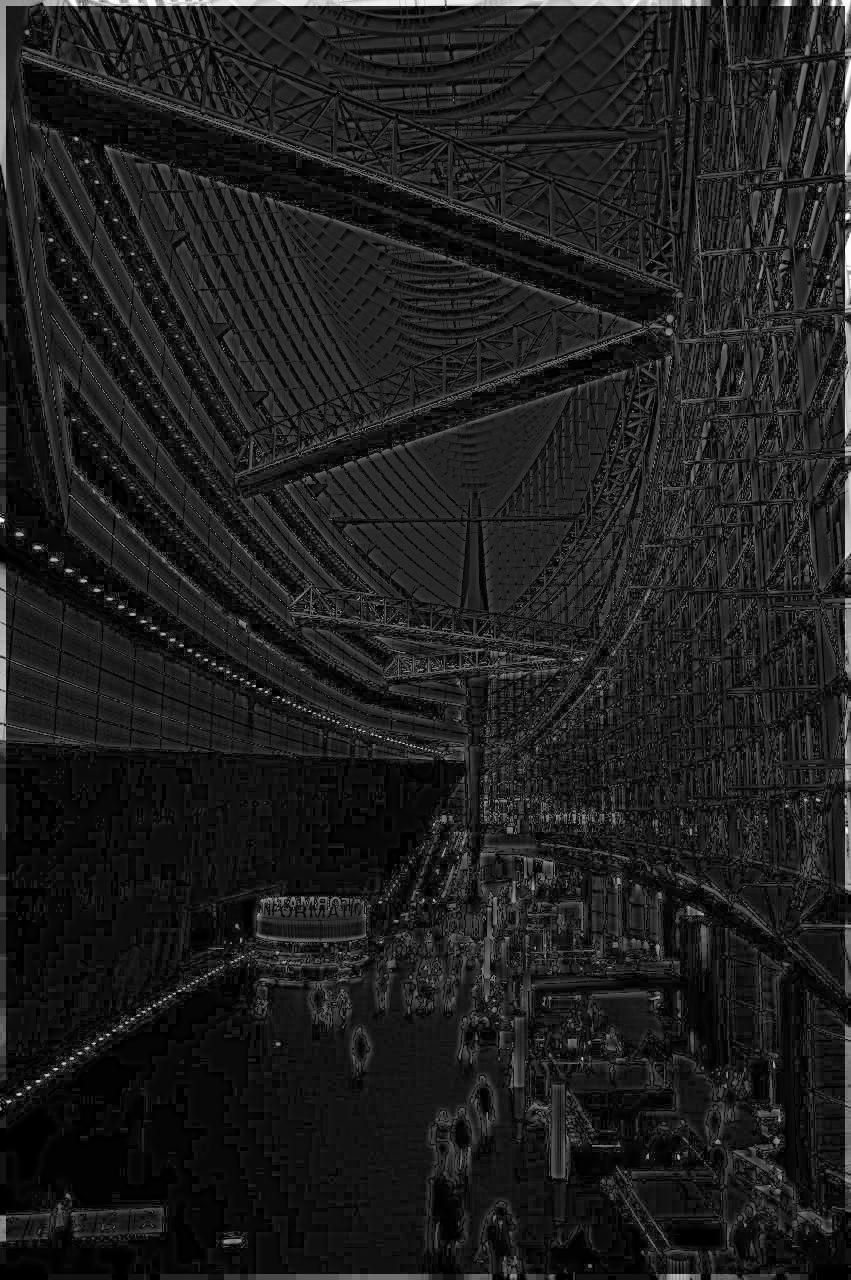

In [11]:
# original (gris) - la del filtro pasa bajos -> tenemos un tono de gris * cte + cte para q quede entre 0 y 255 
# ambas imagenes deben ser float
def filtroUp(img1, img2):
  filtrado = np.absolute(img1 - img2)
  return filtrado

grisTokio_aux = grisTokio.astype(float)
filtroAlto = filtroUp(metodo2_aux, filtroBajo)
howis(filtroAlto)
cv2_imshow(filtroAlto)

# 10) Detección de bordes

(1 punto)

Usando un umbral de 50 despliegue los bordes de la imagen anterior.




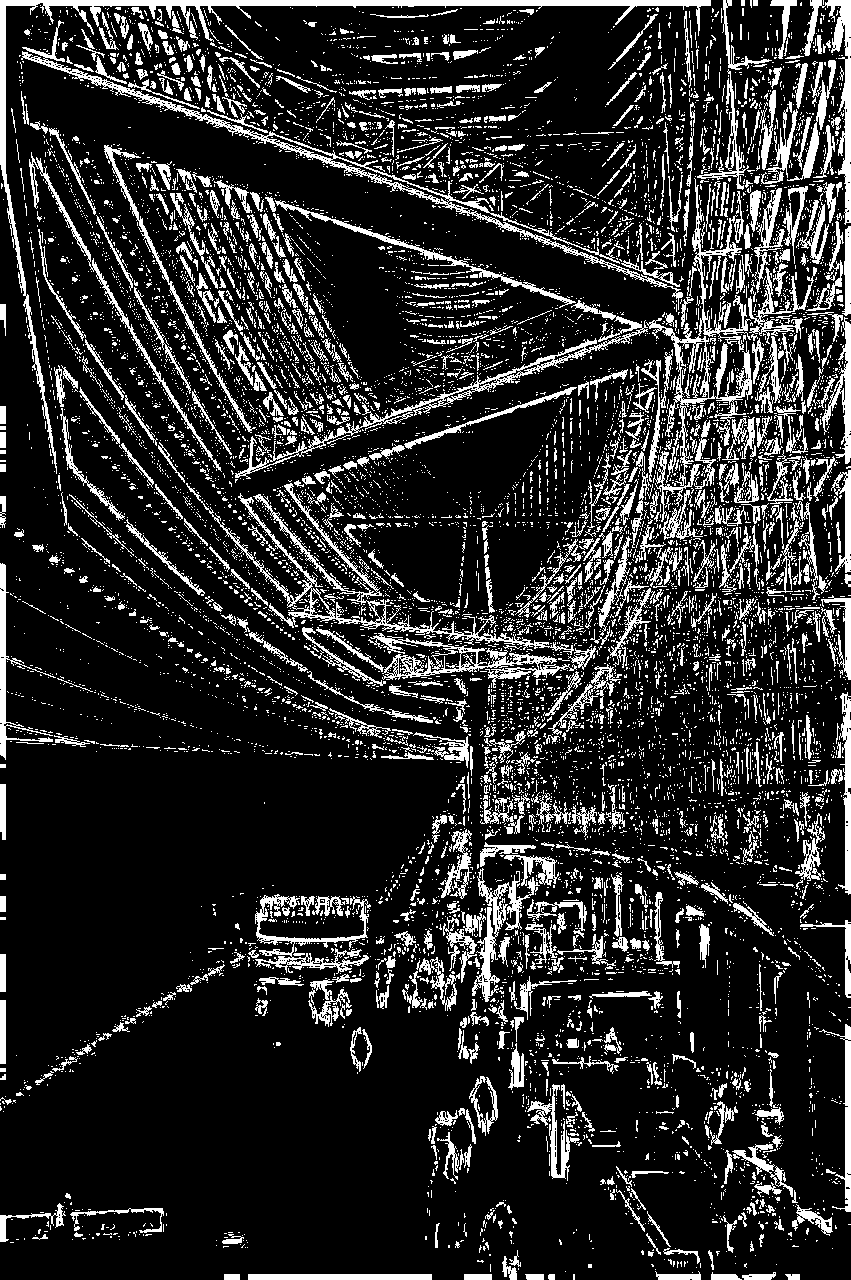

In [12]:
# todo pixel sobre 50 se marca como 1
def bordes(img, umbral):
  N,M = img.shape
  I = np.zeros((N,M))
  for i in range(N):
    for j in range(M):
      if img[i,j] > umbral:
        I[i,j] = 1
  return I
I = bordes(filtroAlto, 50)
cv2_imshow(I*255)

# <font color='red'>SUBIR EJERCICIO DE FORMA INDIVIDUAL A GOOGLE CLASSROOM</font> 

<font color='orange'>(subir archivo NumeroAlumnx.ipynb) </font>

# (Class code: khcdh57) 
